In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- OPTION A: if your file is in Google Drive ---
file_id = "1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y"   # replace if different
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(url)

# --- OPTION B: if you want to upload from laptop ---
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(next(iter(uploaded)))

df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [8]:
df.columns = (df.columns.str.strip()
                          .str.lower()
                          .str.replace(' ', '_')
                          .str.replace('-', '_'))

print(df.columns.tolist())

['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address', 'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines', 'average_cost_for_two', 'currency', 'has_table_booking', 'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu', 'price_range', 'aggregate_rating', 'rating_color', 'rating_text', 'votes']


In [9]:
from collections import Counter

# Make sure column name is lowercase
cuisine_list = []

for cuisines in df['cuisines'].dropna():
    for c in cuisines.split(','):
        cuisine_list.append(c.strip())

# Count cuisines
cuisine_counts = Counter(cuisine_list)

# Top 3 cuisines
top_cuisines = cuisine_counts.most_common(3)
print("Top 3 Cuisines:", top_cuisines)

# Total restaurants
total_restaurants = len(df)

# Calculate % of restaurants serving them
top_cuisines_percent = [(cuisine, count, round((count/total_restaurants)*100, 2))
                        for cuisine, count in top_cuisines]

print("Top 3 Cuisines with Percentage:")
for c in top_cuisines_percent:
    print(f"{c[0]}: {c[1]} restaurants ({c[2]}%)")


Top 3 Cuisines: [('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]
Top 3 Cuisines with Percentage:
North Indian: 3960 restaurants (41.46%)
Chinese: 2735 restaurants (28.64%)
Fast Food: 1986 restaurants (20.79%)


In [10]:
# Count restaurants per city
city_counts = df['city'].value_counts()

print("Top 5 cities by restaurant count:")
print(city_counts.head(5))

top_city = city_counts.idxmax()
top_count = city_counts.max()
print(f"\nCity with the highest number of restaurants: {top_city} ({top_count})")


Top 5 cities by restaurant count:
city
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

City with the highest number of restaurants: New Delhi (5473)


In [11]:
# Average rating for each city
city_avg_rating = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)

print("Top 5 cities by average rating:")
print(city_avg_rating.head(5))


Top 5 cities by average rating:
city
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: aggregate_rating, dtype: float64


In [12]:
best_city = city_avg_rating.idxmax()
best_rating = city_avg_rating.max()

print(f"City with the highest average rating: {best_city} (Rating: {round(best_rating,2)})")


City with the highest average rating: Inner City (Rating: 4.9)


In [13]:
df.columns


Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [14]:
# Count how many restaurants fall into each price range
price_counts = df['price_range'].value_counts().sort_index()

print("Restaurants in each price range:")
print(price_counts)


Restaurants in each price range:
price_range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


In [15]:
# Total number of restaurants
total_restaurants = len(df)

# Percentage for each price range
price_percent = (price_counts / total_restaurants) * 100

print("Percentage of restaurants in each price range:")
print(price_percent.round(2))


Percentage of restaurants in each price range:
price_range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


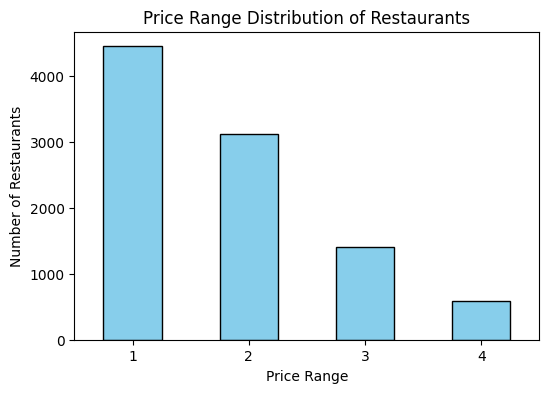

In [16]:
import matplotlib.pyplot as plt

# Plot bar chart for price range distribution
plt.figure(figsize=(6,4))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Price Range Distribution of Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.show()



In [17]:
df.columns



Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [18]:
# Count how many restaurants offer online delivery
delivery_counts = df['has_online_delivery'].value_counts()

print("Online Delivery availability:")
print(delivery_counts)



Online Delivery availability:
has_online_delivery
No     7100
Yes    2451
Name: count, dtype: int64


In [19]:
# Total restaurants
total_restaurants = len(df)

# Percentage calculation
delivery_percent = (delivery_counts / total_restaurants) * 100

print("Percentage of restaurants offering online delivery:")
print(delivery_percent.round(2))


Percentage of restaurants offering online delivery:
has_online_delivery
No     74.34
Yes    25.66
Name: count, dtype: float64


In [20]:
# Average ratings for restaurants with vs without online delivery
rating_comparison = df.groupby('has_online_delivery')['aggregate_rating'].mean()

print("Average Ratings (0 = No delivery, 1 = Delivery):")
print(rating_comparison)


Average Ratings (0 = No delivery, 1 = Delivery):
has_online_delivery
No     2.465296
Yes    3.248837
Name: aggregate_rating, dtype: float64


In [21]:
# Count most common cuisine combinations
combo_counts = df['cuisines'].value_counts().head(10)

print("Top 10 cuisine combinations:")
print(combo_counts)


Top 10 cuisine combinations:
cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [22]:
# Average rating for each cuisine combination
combo_avg_rating = df.groupby('cuisines')['aggregate_rating'].mean()

# Show avg ratings for top 10 cuisine combos
top_combos_with_ratings = combo_avg_rating.loc[combo_counts.index]

print("Average Ratings for Top 10 Cuisine Combinations:")
print(top_combos_with_ratings)


Average Ratings for Top 10 Cuisine Combinations:
cuisines
North Indian                      1.672329
North Indian, Chinese             2.421722
Chinese                           2.042090
Fast Food                         2.118362
North Indian, Mughlai             2.888623
Cafe                              2.890970
Bakery                            1.924312
North Indian, Mughlai, Chinese    2.568528
Bakery, Desserts                  2.317647
Street Food                       2.161745
Name: aggregate_rating, dtype: float64


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


In [6]:
import pandas as pd

# Load the uploaded CSV (replace with exact filename shown after upload if needed)
df = pd.read_csv("Dataset .csv")

df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [8]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
print(df.columns.tolist())



['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


Average Ratings for Top 10 Cuisine Combinations:
Cuisines
North Indian                      1.672329
North Indian, Chinese             2.421722
Chinese                           2.042090
Fast Food                         2.118362
North Indian, Mughlai             2.888623
Cafe                              2.890970
Bakery                            1.924312
North Indian, Mughlai, Chinese    2.568528
Bakery, Desserts                  2.317647
Street Food                       2.161745
Name: Aggregate rating, dtype: float64


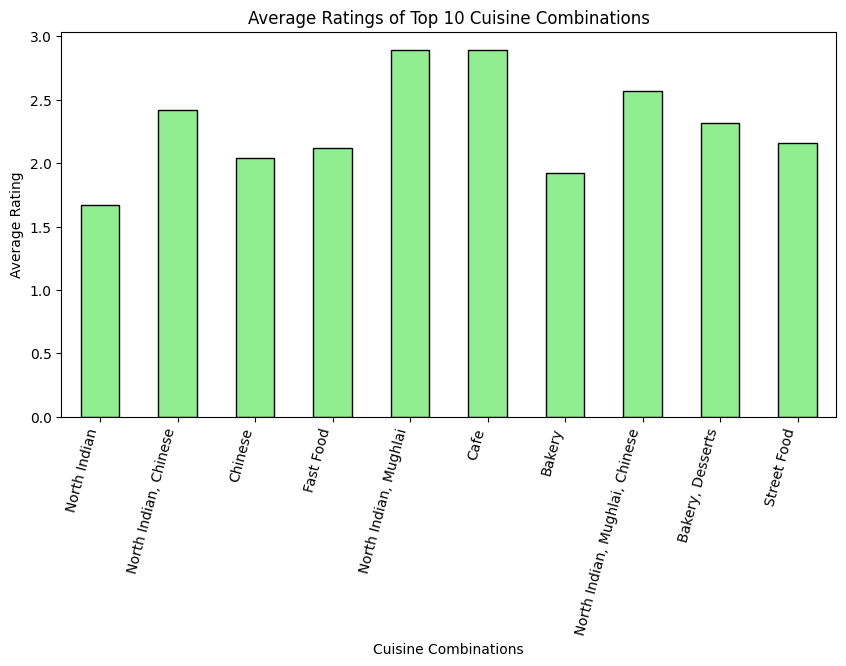

In [11]:
# Top 10 cuisine combinations
combo_counts = df['Cuisines'].value_counts().head(10)

# Average rating for each cuisine combination
combo_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean()

# Match only top 10 combos
top_combos_with_ratings = combo_avg_rating.loc[combo_counts.index]

print("Average Ratings for Top 10 Cuisine Combinations:")
print(top_combos_with_ratings)

# Bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
top_combos_with_ratings.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Average Ratings of Top 10 Cuisine Combinations")
plt.xlabel("Cuisine Combinations")
plt.ylabel("Average Rating")
plt.xticks(rotation=75, ha='right')
plt.show()


In [12]:
for col in df.columns:
    print(col)



Restaurant ID
Restaurant Name
Country Code
City
Address
Locality
Locality Verbose
Longitude
Latitude
Cuisines
Average Cost for two
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Price range
Aggregate rating
Rating color
Rating text
Votes


Average Ratings for Top 10 Cuisine Combinations:
Cuisines
North Indian                      1.672329
North Indian, Chinese             2.421722
Chinese                           2.042090
Fast Food                         2.118362
North Indian, Mughlai             2.888623
Cafe                              2.890970
Bakery                            1.924312
North Indian, Mughlai, Chinese    2.568528
Bakery, Desserts                  2.317647
Street Food                       2.161745
Name: Aggregate rating, dtype: float64


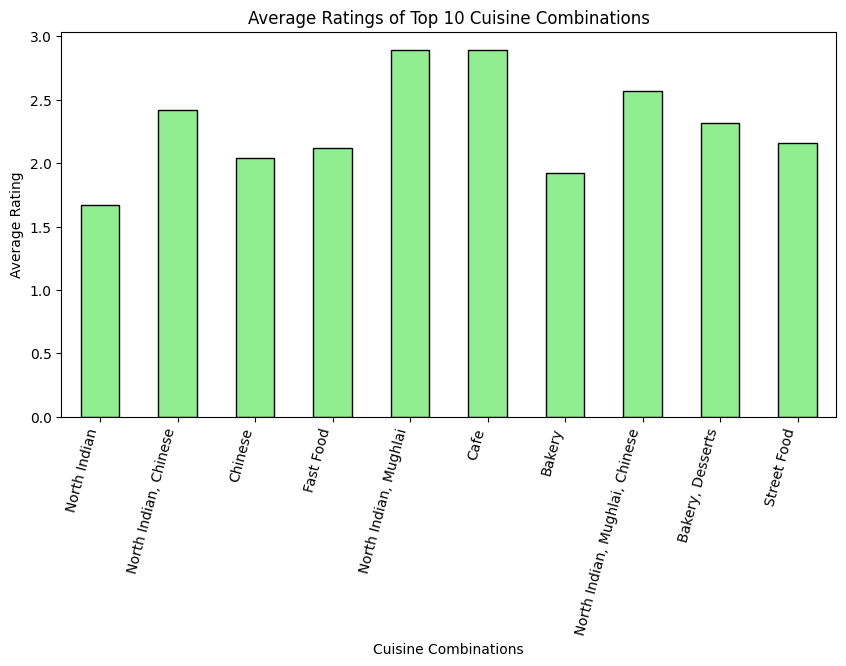

In [13]:
import matplotlib.pyplot as plt

# Step 1: Top 10 cuisine combinations
combo_counts = df['Cuisines'].value_counts().head(10)

# Step 2: Average rating for each cuisine combination
combo_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean()

# Step 3: Select only the top 10 combos
top_combos_with_ratings = combo_avg_rating.loc[combo_counts.index]

print("Average Ratings for Top 10 Cuisine Combinations:")
print(top_combos_with_ratings)

# Step 4: Plot bar chart
plt.figure(figsize=(10,5))
top_combos_with_ratings.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Average Ratings of Top 10 Cuisine Combinations")
plt.xlabel("Cuisine Combinations")
plt.ylabel("Average Rating")
plt.xticks(rotation=75, ha='right')
plt.show()


In [14]:
from collections import Counter

# Split cuisines into combinations exactly as they appear
combo_counts = df['Cuisines'].value_counts().head(10)

print("Top 10 cuisine combinations:")
print(combo_counts)


Top 10 cuisine combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [15]:
# Average rating for each cuisine combination
combo_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean()

# Select top 10 combos with ratings
top_combos_with_ratings = combo_avg_rating.loc[combo_counts.index]

print("\nAverage Ratings for Top 10 Cuisine Combinations:")
print(top_combos_with_ratings)



Average Ratings for Top 10 Cuisine Combinations:
Cuisines
North Indian                      1.672329
North Indian, Chinese             2.421722
Chinese                           2.042090
Fast Food                         2.118362
North Indian, Mughlai             2.888623
Cafe                              2.890970
Bakery                            1.924312
North Indian, Mughlai, Chinese    2.568528
Bakery, Desserts                  2.317647
Street Food                       2.161745
Name: Aggregate rating, dtype: float64


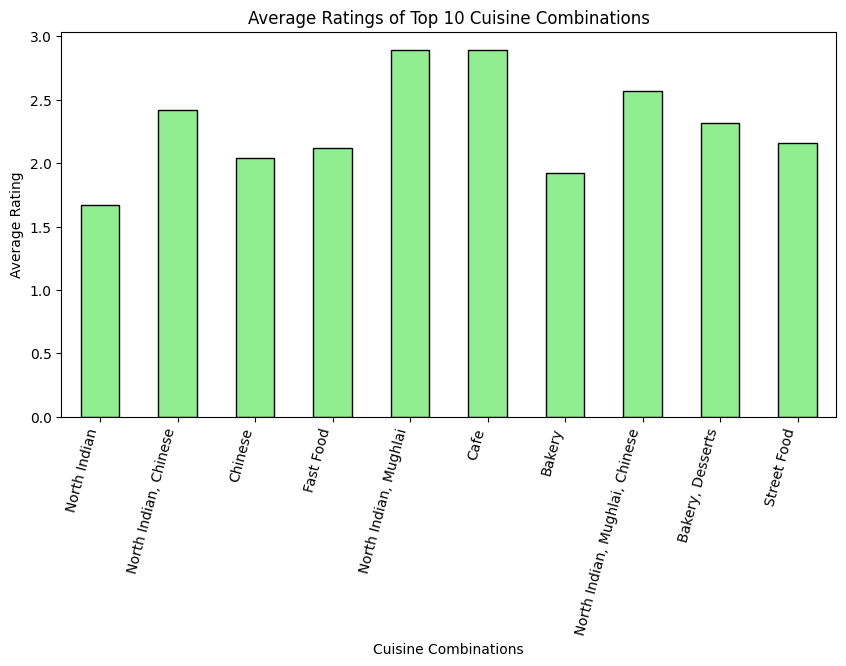

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top_combos_with_ratings.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Average Ratings of Top 10 Cuisine Combinations")
plt.xlabel("Cuisine Combinations")
plt.ylabel("Average Rating")
plt.xticks(rotation=75, ha='right')
plt.show()



In [17]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

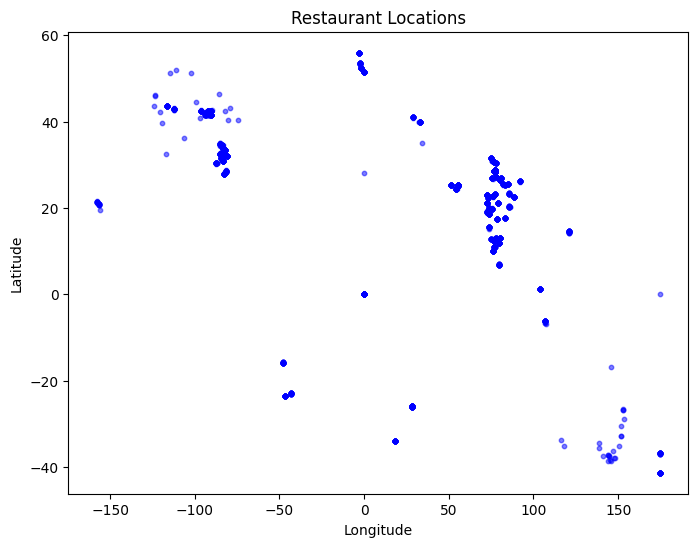

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10, c='blue')

plt.title("Restaurant Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



In [19]:
!pip install folium
import folium


In [20]:
# Center map at average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=11)

# Add points to map (this may take time if dataset is large)
for lat, lon in zip(df['Latitude'], df['Longitude']):
    folium.CircleMarker(location=[lat, lon],
                        radius=2,
                        color="blue",
                        fill=True,
                        fill_opacity=0.5).add_to(restaurant_map)

# Show map
restaurant_map


In [21]:
# Count how many times each restaurant name appears
chain_counts = df['Restaurant Name'].value_counts()

# Filter only chains (appearing more than once)
restaurant_chains = chain_counts[chain_counts > 1]

print("Top 10 Restaurant Chains:")
print(restaurant_chains.head(10))


Top 10 Restaurant Chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [22]:
# Average rating and votes for each restaurant (grouped by name)
chain_analysis = df.groupby('Restaurant Name')[['Aggregate rating','Votes']].mean()

# Select only the chains we found earlier
chain_analysis = chain_analysis.loc[restaurant_chains.index]

# Sort by average rating (top 10)
top_rated_chains = chain_analysis.sort_values(by='Aggregate rating', ascending=False).head(10)

print("Top 10 Restaurant Chains by Average Rating:")
print(top_rated_chains)

# Sort by votes (most popular)
most_popular_chains = chain_analysis.sort_values(by='Votes', ascending=False).head(10)

print("\nTop 10 Most Popular Restaurant Chains (by votes):")
print(most_popular_chains)


Top 10 Restaurant Chains by Average Rating:
                           Aggregate rating   Votes
Restaurant Name                                    
Talaga Sampireun                      4.900  1838.0
AB's Absolute Barbecues               4.850  1575.5
Silantro Fil-Mex                      4.850   682.0
AB's - Absolute Barbecues             4.825  3350.0
Naturals Ice Cream                    4.800  1547.0
Gymkhana                              4.700   164.0
The Cheesecake Factory                4.650  1505.0
Dishoom                               4.600   634.5
Garota de Ipanema                     4.600    29.5
Chili's                               4.580  1631.2

Top 10 Most Popular Restaurant Chains (by votes):
                           Aggregate rating        Votes
Restaurant Name                                         
Truffles                           3.950000  4841.000000
Joey's Pizza                       4.250000  3903.500000
AB's - Absolute Barbecues          4.825000  3350.000

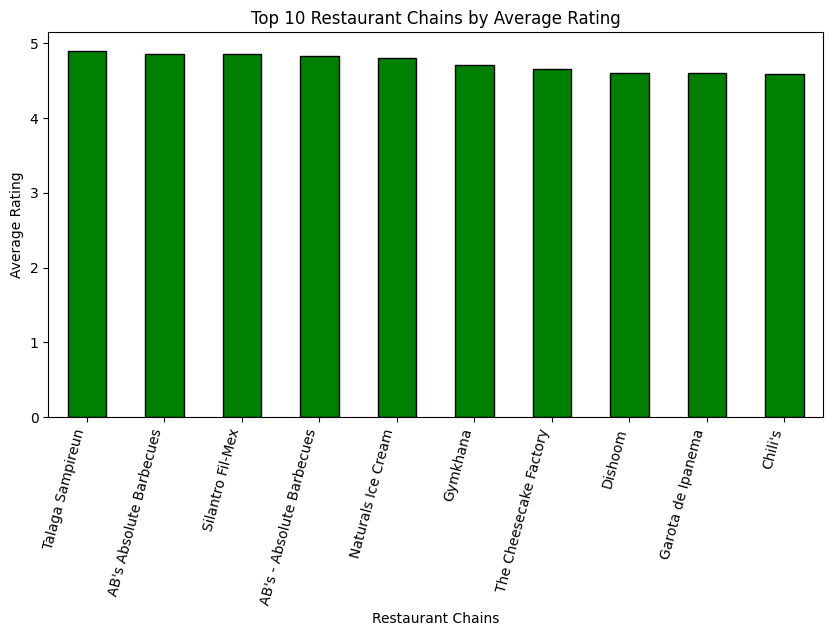

In [23]:
import matplotlib.pyplot as plt

# Plot top rated chains
plt.figure(figsize=(10,5))
top_rated_chains['Aggregate rating'].plot(kind='bar', color='green', edgecolor='black')

plt.title("Top 10 Restaurant Chains by Average Rating")
plt.xlabel("Restaurant Chains")
plt.ylabel("Average Rating")
plt.xticks(rotation=75, ha='right')
plt.show()


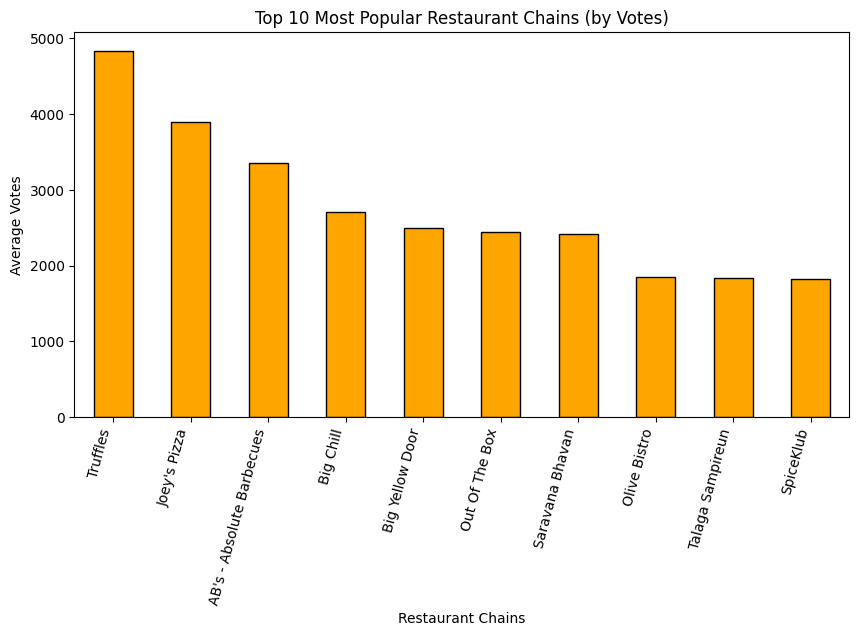

In [24]:
# Plot most popular chains
plt.figure(figsize=(10,5))
most_popular_chains['Votes'].plot(kind='bar', color='orange', edgecolor='black')

plt.title("Top 10 Most Popular Restaurant Chains (by Votes)")
plt.xlabel("Restaurant Chains")
plt.ylabel("Average Votes")
plt.xticks(rotation=75, ha='right')
plt.show()


In [25]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [27]:
for col in df.columns:
    print(col)


Restaurant ID
Restaurant Name
Country Code
City
Address
Locality
Locality Verbose
Longitude
Latitude
Cuisines
Average Cost for two
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Price range
Aggregate rating
Rating color
Rating text
Votes


In [28]:
# Restaurant with highest votes
highest_votes = df.loc[df['Votes'].idxmax(), ['Restaurant Name','Votes','Aggregate rating']]
print("Restaurant with Highest Votes:\n", highest_votes)

# Restaurant with lowest votes
lowest_votes = df.loc[df['Votes'].idxmin(), ['Restaurant Name','Votes','Aggregate rating']]
print("\nRestaurant with Lowest Votes:\n", lowest_votes)


Restaurant with Highest Votes:
 Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with Lowest Votes:
 Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object


In [29]:
# Correlation between votes and ratings
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between Votes and Aggregate Rating:", round(correlation, 3))



Correlation between Votes and Aggregate Rating: 0.314


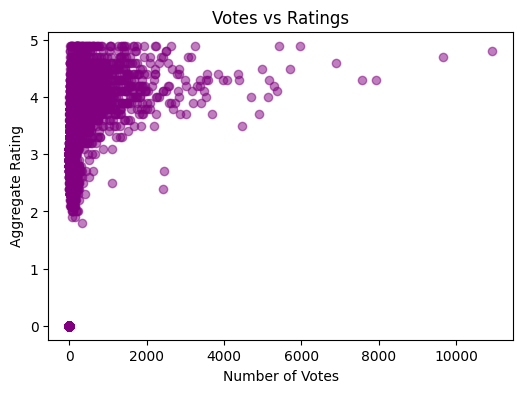

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5, color='purple')

plt.title("Votes vs Ratings")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.show()


In [32]:
for col in df.columns:
    print(col)


Restaurant ID
Restaurant Name
Country Code
City
Address
Locality
Locality Verbose
Longitude
Latitude
Cuisines
Average Cost for two
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Price range
Aggregate rating
Rating color
Rating text
Votes


In [33]:
# Price Range vs Online Delivery
delivery_vs_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
print("Price Range vs Online Delivery (%):")
print(delivery_vs_price)

# Price Range vs Table Booking
booking_vs_price = pd.crosstab(df['Price range'], df['Has Table booking'], normalize='index') * 100
print("\nPrice Range vs Table Booking (%):")
print(booking_vs_price)


Price Range vs Online Delivery (%):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Price Range vs Table Booking (%):
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


In [34]:
# Price Range vs Online Delivery
delivery_vs_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
print("Price Range vs Online Delivery (%):")
print(delivery_vs_price)

# Price Range vs Table Booking
booking_vs_price = pd.crosstab(df['Price range'], df['Has Table booking'], normalize='index') * 100
print("\nPrice Range vs Table Booking (%):")
print(booking_vs_price)


Price Range vs Online Delivery (%):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Price Range vs Table Booking (%):
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


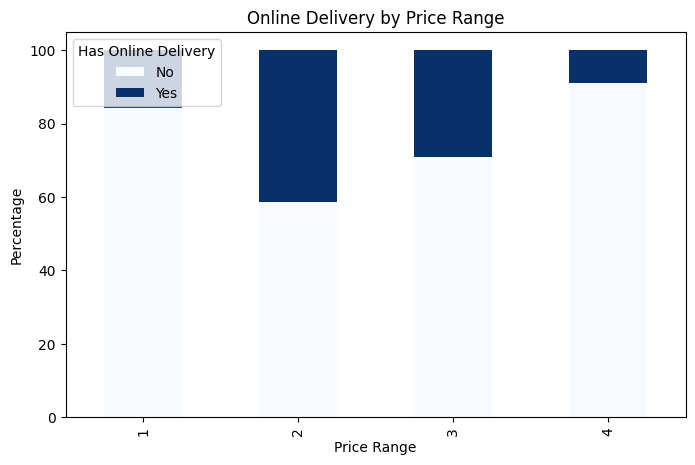

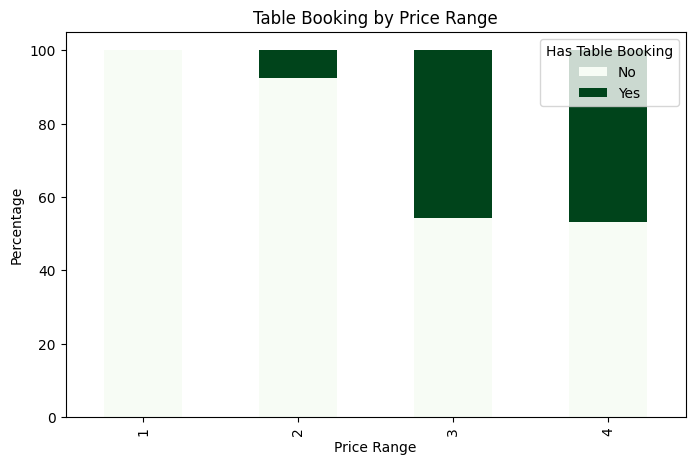

In [35]:
import matplotlib.pyplot as plt

# Online delivery vs price range
delivery_vs_price.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Blues")
plt.title("Online Delivery by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(title="Has Online Delivery", labels=["No", "Yes"])
plt.show()

# Table booking vs price range
booking_vs_price.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Greens")
plt.title("Table Booking by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(title="Has Table Booking", labels=["No", "Yes"])
plt.show()


In [36]:
# Average rating grouped by price range
avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean()

print("Average Rating by Price Range:")
print(avg_rating_price)


Average Rating by Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


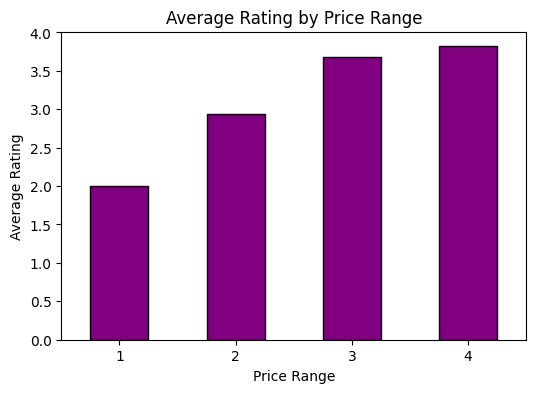

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
avg_rating_price.plot(kind='bar', color='purple', edgecolor='black')

plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()
